<a href="https://colab.research.google.com/github/Juna78/Data-Science-III/blob/main/Trabajo_Final_Andres_Carrizo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DE SENTIMIENTOS EN RESEÑAS DE INSTRUMENTOS MUSICALES**
Data Science III: NLP y Deep Learning aplicado a Ciencia de Datos

Autor: Andres Carrizo

El dataset utilizado es "Amazon Musical Instruments Reviews" (disponible en Kaggle).

Descripción: Este proyecto se enfoca en examinar opiniones de clientes sobre accesorios musicales en Amazon, con el objetivo de clasificar de manera automática las emociones manifestadas (favorables, desfavorables o neutrales) mediante métodos de procesamiento de lenguaje natural (NLP) y aprendizaje profundo. El trabajo se basa en los conceptos de ciencia de datos no tabular y NLP, ofreciendo una solución práctica para fabricantes, comercios digitales y responsables de marketing.

Objetivos:

>* Preparación de Datos: limpiar y acondicionar los datos brutos a través de tokenización, lematización, eliminación de palabras vacías y otros procesos de NLP.
>* Exploración de Datos: Detectar tendencias (mediante nubes de palabras, bigramas/trigramas y reconocimiento de entidades) para comprender lo que perciben loss consumidores.
>* Construcción de Modelos: Desarrollar modelos de Aprendizaje Automático (Regresión Logística con TF-IDF) y aprendizaje profundo para la clasificación de sentimientos.
>* Medición y Representación Visual: Evaluar como se desempeñan los modelos mediante métricas (exactitud, puntaje) y gráficos informativos.
>* Implementación Real: Generar información que sea de importancia para mejorar la eficiencia en lad empresas.



# 1. INTRODUCCIÓN

En el comercio electrónico, las reseñas y opiniones de los consumidores representan una fuente de información muy importante. Este análisis permite a las empresas ver aspectos positivos y áreas a mejorar en sus productos, tácticas de marketing y escuchar sugerencias reales de compradores. En el mercado de instrumentos/accesorios musicales, estas reseñas incluyen aspectos como calidad de sonido, durabilidad, facilidad de uso y relación precio-calidad, pudiéndose aplicar técnicas de procesamiento de lenguaje natural y Deep Learning. Este proyecto clasifica automáticamente el sentimiento de las reseñas (positivo, negativo y neutro), presentanndo insights para fabricantes y/o plataformas de venta.

### MOTIVACION

Las decisiones de compra están en su gran mayoria influenciadas por opiniones online de commpradores anteriores. Un análisis automatizado de sentimientos permite monitorear el peso de una marca, identificar problemas de productos y personalizar estrategias comerciales.
Este proyecto personal sirve para afianzar conocimientos de NLP y Deep Learning del curso Data Science III.

### AUDIENCIA

>* Fabricantes de instrumentos y accesorios musicales: Para evaluar la percepción de sus productos (por ej., guitarras, pedales, cuerdas).
>* Plataformas de venta como Amazon o Mercadolibre, para clasificar reseñas y destacar opiniones útiles.


### HIPOTESIS

Las técnicas de NLP (tokenización, lematización, TF-IDF) y deep learning mejoran la clasificación de sentimientos en datos no tabulares.
El análisis exploratorio (nubes de palabras, n-gramas, NER) revelan patrones impoiortantes en la percepción de productos musicales.

# 2. INSTALACION E IMPORTACION DE LIBRERIAS

Voy a usar librerias para NLP, modelado y visualización, para asegurar una buena interpretación de los resultados.

In [1]:
#Instalo librerias necesarias
#Dataset en ingles por ese cargo modelo ingles de spacy
!pip install pandas numpy spacy wordcloud matplotlib scikit-learn tensorflow textblob vaderSentiment
!pip install -q nltk spacy
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Las librerias a usar:

>* Pandas, numpy: manipulación y análisis de datos.
>* Spacy, nltk: procesamiento de texto (tokenización, lematización, NER).
>* Wordcloud, matplotlib, seaborn: visualización de patrones textuales y resultados.
>* Scikit-learn: vectorización (TF-IDF) y modelo regresión logística.
>* Tensorflow/keras: modelado deep learning.
textblob, vaderSentiment: análisis de sentimiento inicial.

In [1]:
#Librerias

import pandas as pd
import numpy as np
import tensorflow as tf
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from collections import Counter
import re
import string
import nltk
import os
import zipfile


#Herramientas de Natural Language Tool Kit

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer




PROCESAMIENTO DE TEXTO

In [2]:
#Descargo recursos NLTK

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
#Proceso texto con spacy

import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

# 3. CARGA DE DATASET
Cargo el dataset y realizo inspección inicial para entender su estructura y calidad.

In [4]:
#Dataset

data = pd.read_csv('https://raw.githubusercontent.com/Juna78/Data-Science-III/refs/heads/main/Musical_instruments_reviews.csv')  # Reemplaza con el path real
print("Forma del dataset:", data.shape)
data.head()
data.info()
data.describe(include='all')


#Valores nulos

data['reviewText'] = data['reviewText'].fillna('')
data['summary'] = data['summary'].fillna('')

Forma del dataset: (10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


Análisis preliminar:

Estructura: El dataset contiene columnas como reviewerID, asin, reviewText, overall, etc. La columna reviewText es la fuente principal de datos no tabulares para NLP.
Valores Nulos: Se rellenan con cadenas vacías para evitar errores en el procesamiento de texto.
Reemplazo de ASIN: Los códigos del estilo "B003VWJ2K8" y "B0002E1G5C" se renombran con sus respectivas marcas para facilitar la interpretación en análisis y visualizaciones.

In [5]:
#Reemplazo valores columna ASIN

data['asin'] = data['asin'].replace({
    'B003VWJ2K8': 'Snark PL1',
    'B0002E1G5C': 'DAddario PWinder',
    'B0002F7K7Y': 'DAddario EXL110',
    'B003VWKPHC': 'Snark ST2',
    'B0002H0A3S': 'DAddario EJ26',
    'B0002CZVXM': 'Dunlop Nsaddle',
    'B0002CZVXM': 'On Stage XCG64',
    'B0009G1E0K': 'Protec Polyst',
    'B0002E2KPC': 'Jim Dunlop Capo',
    'B0002GLDQM': 'Jim Dunlop 5006SI',
})



VISUALIZACION

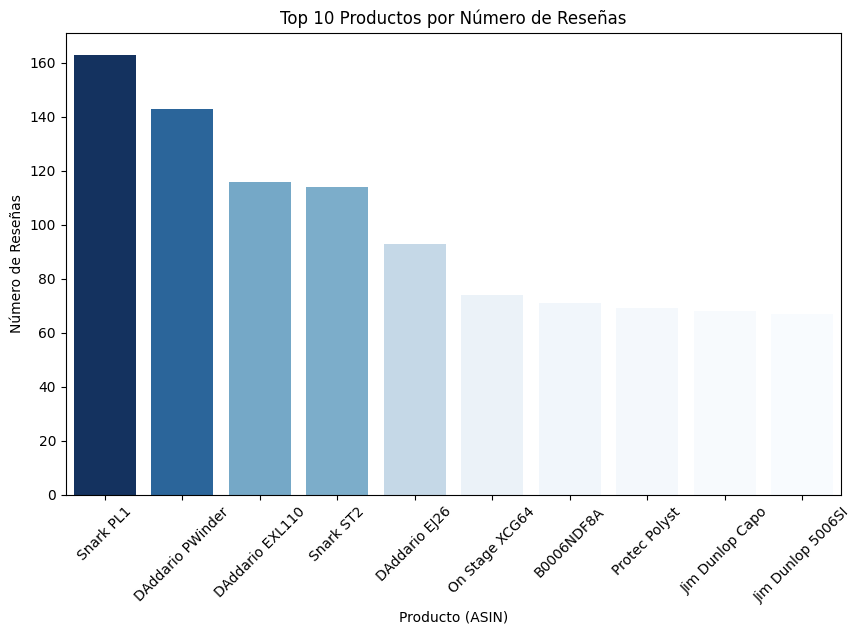

In [6]:
#Grafico distribucion de productos despues del reemplazo
top_products = data['asin'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, hue=top_products.values, palette='Blues', legend=False)
plt.title('Top 10 Productos por Número de Reseñas')
plt.xticks(rotation=45)
plt.xlabel('Producto (ASIN)')
plt.ylabel('Número de Reseñas')
plt.show()

Insight: El gráfico muestra los productos con más reseñas, como "Snark" y "DAddario" ahora identificados, facilitando la interpretación.

#4. EXPLORACION DEL DATASET

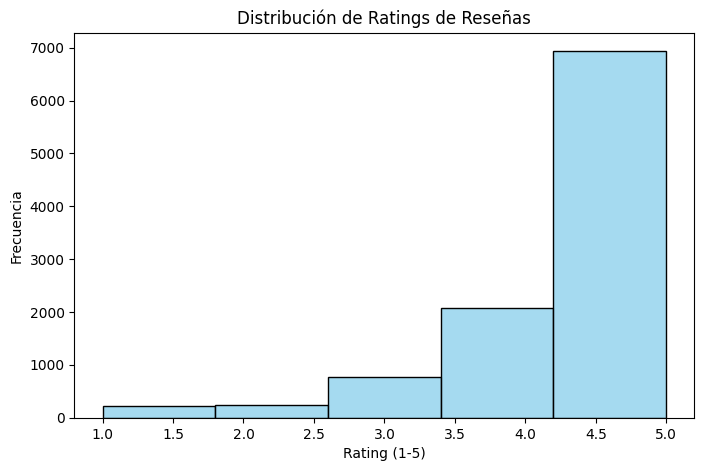

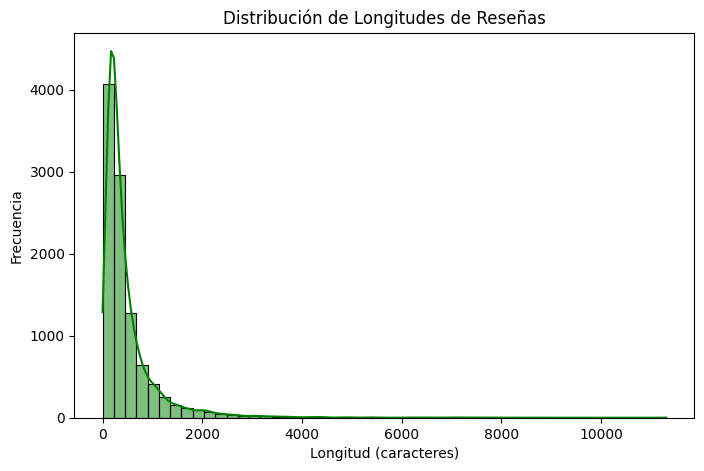

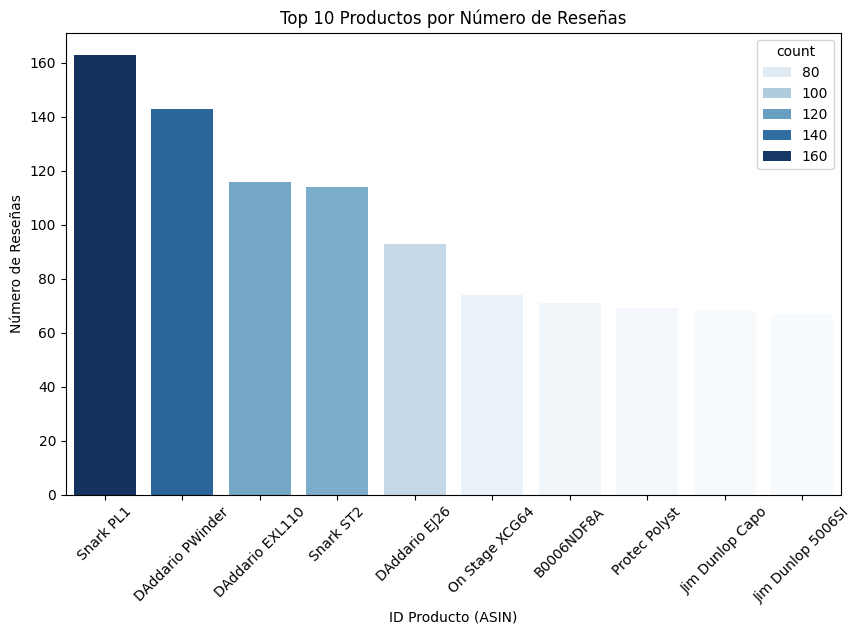

In [7]:
#Distribucin raitings

plt.figure(figsize=(8, 5))
sns.histplot(data['overall'], bins=5, kde=False, color='skyblue')
plt.title('Distribución de Ratings de Reseñas')
plt.xlabel('Rating (1-5)')
plt.ylabel('Frecuencia')
plt.show()

#Longitud reseñas

data['review_length'] = data['reviewText'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data['review_length'], bins=50, kde=True, color='green')
plt.title('Distribución de Longitudes de Reseñas')
plt.xlabel('Longitud (caracteres)')
plt.ylabel('Frecuencia')
plt.show()

#Top 10 reseñas por producto

top_products = data['asin'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, hue=top_products, palette='Blues')
plt.title('Top 10 Productos por Número de Reseñas')
plt.xticks(rotation=45)
plt.xlabel('ID Producto (ASIN)')
plt.ylabel('Número de Reseñas')
plt.show()

Análisis:

Distribución de Ratings: la mayoría de las reseñas tienen ratings altos (4-5), indicando sesgo hacia opiniones positivas, lo que puede afectar el balance de clases en el modelado.
Longitud de Reseñas: las reseñas varían en longitud, con algunas muy cortas y otras bastante largas. El boxplot revela si las reseñas negativas (1-2) tienden a ser más largas. Podría tratarse de quejas mas explicadas.
Relevancia Empresarial: productos con muchas reseñas (e.g., Snark, DAddario) son la prioridad para el análisis, ya que muestran el mayor interés del comprador.

Insight: el sesgo noomhbrado anteriormente sugiere que el modelo deberá manejar clases desbalanceadas, y la variabilidad en longitud indica la necesidad de un preprocesamiento fuerte.

#5. PREPROCESAMIENTO DEL TEXTO

Aplico técnicas de NLP para limpiar y preparar el texto de las reseñas.

In [8]:
def preprocess_text(text):
  #Sacar simbolos y puntuacion
    text = re.sub(r'[^\w\s]', '', text)

    #Todo a minusculas
    text = text.lower()

    #Tokenizo
    tokens = word_tokenize(text)

    #Saco stopwords
    tokens = [word for word in tokens if word not in stop_words]

    #Lematizacion
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmas)

data['cleaned_review'] = data['reviewText'].apply(preprocess_text)
print(data['cleaned_review'].head())

0    much write exactly supposed filter pop sound r...
1    product exactly quite affordablei realized dou...
2    primary job device block breath would otherwis...
3    nice windscreen protects mxl mic prevents pop ...
4    pop filter great look performs like studio fil...
Name: cleaned_review, dtype: object


Análisis:

>* Limpieza: elimina el ruido innecesario (puntuación, símbolos) para enfocar el análisis a palabras significativas.
>* Minúsculas: estandariza el texto, evitando diferencias de variables como "Great" y "great".
>* Tokenización: divide el texto en palabras individuales.
>* Stopwords: elimina palabras comunes (en este dataset por ejemplo, "the", "and") que no son importantes para el análisis.
>* Lematización: lleva las palabras a su raíz, mejorando la eficiencia.


Observación: la distribución de longitudes de reseñas limpias junto a la eliminación de stopwords y puntuación optimiza el modelado.

Insight: el preprocesamiento reduce el ruido textual, mejorando la calidad de los datos para análisis exploratorios y modelado supervisado, lo cual fue señalado como imprescindible anteriormente.

#6. ANALISIS EXPLORATORIO AVANZADO

Exploro si existen patrones en el texto mediante nubes de palabras, n-gramas y reconocimiento de  entidades nombradas (NER)

NUBE DE PALABRAS

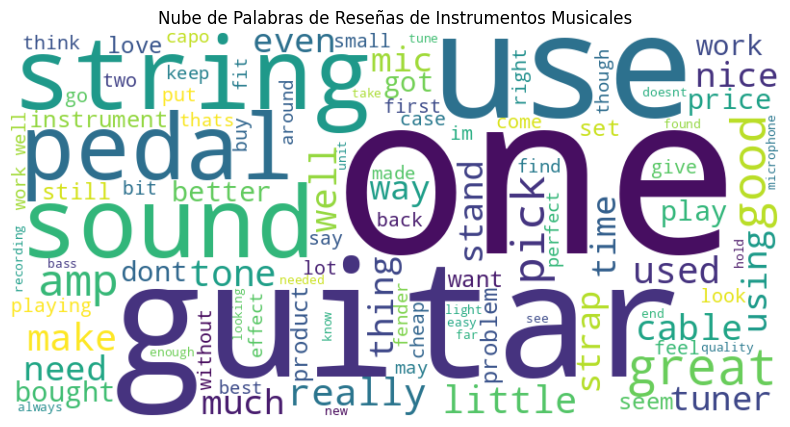

In [9]:
#Nube de palabras

all_text = ' '.join(data['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas de Instrumentos Musicales')
plt.show()

Análisis: en la nube se destacan palabras frecuentes como "guitar", "sound", "great", reflejando temas centrales (instrumentos, calidad). Palabras positivas dominan, alineándose con la distribución de los ratings anteriores.

N-GRAMAS (Bigramas y trigramas)

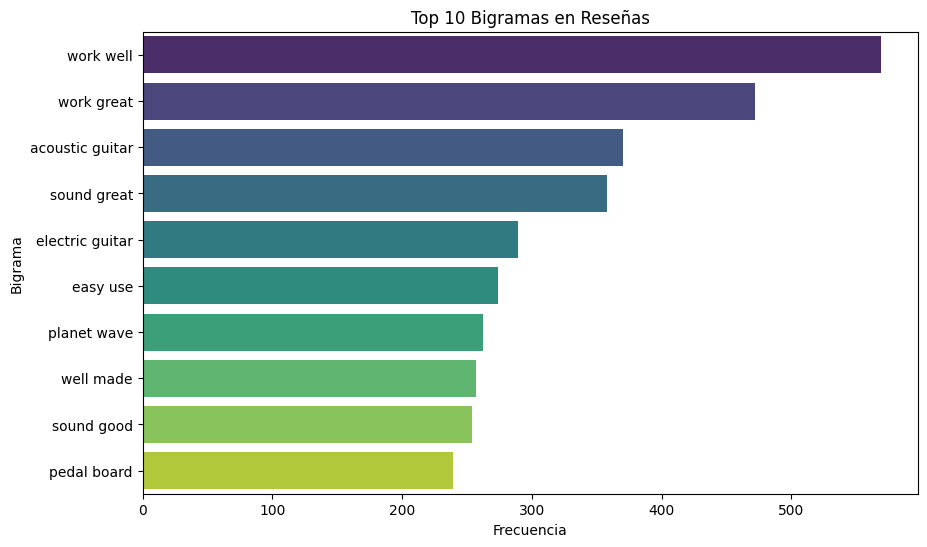

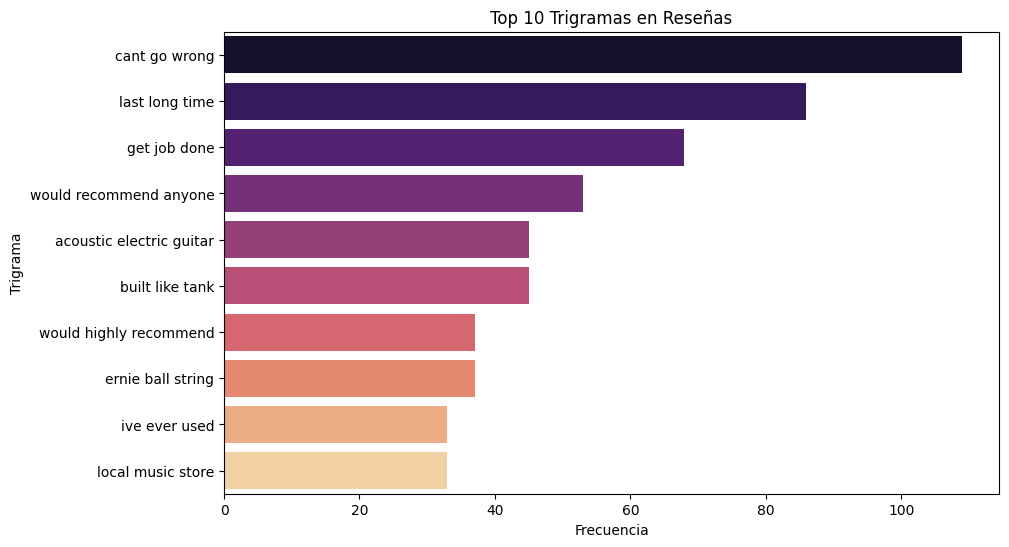

In [10]:
#N-gramas
#Defino funcion

def get_ngrams(text, n=2):
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return Counter([' '.join(ngram) for ngram in ngrams])


#Bigramas

bigrams = get_ngrams(all_text, 2)
bigrams_df = pd.DataFrame(bigrams.most_common(10), columns=['Bigrama', 'Frecuencia'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Bigrama', data=bigrams_df, hue='Bigrama', palette='viridis', legend=False)
plt.title('Top 10 Bigramas en Reseñas')
plt.show()


#Trigramas

trigrams = get_ngrams(all_text, 3)
trigrams_df = pd.DataFrame(trigrams.most_common(10), columns=['Trigrama', 'Frecuencia'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Trigrama', data=trigrams_df, hue='Trigrama', palette='magma', legend=False)
plt.title('Top 10 Trigramas en Reseñas')
plt.show()

Análisis:

>* Bigramas: combinaciones como "works well", "great sound" indican satisfacción, funcionalidad y calidad.
>* Trigramas: Frases como "last long time" o "can't go wrong" son atributos muy valorados por los compradores.

Estos patrones son útiles para fabricante porque destacand aspectos específicos que los futuros usuarios aprecian.

RECONOCIMIENTO DE ENTIDADES NOMBRADAS (NER)

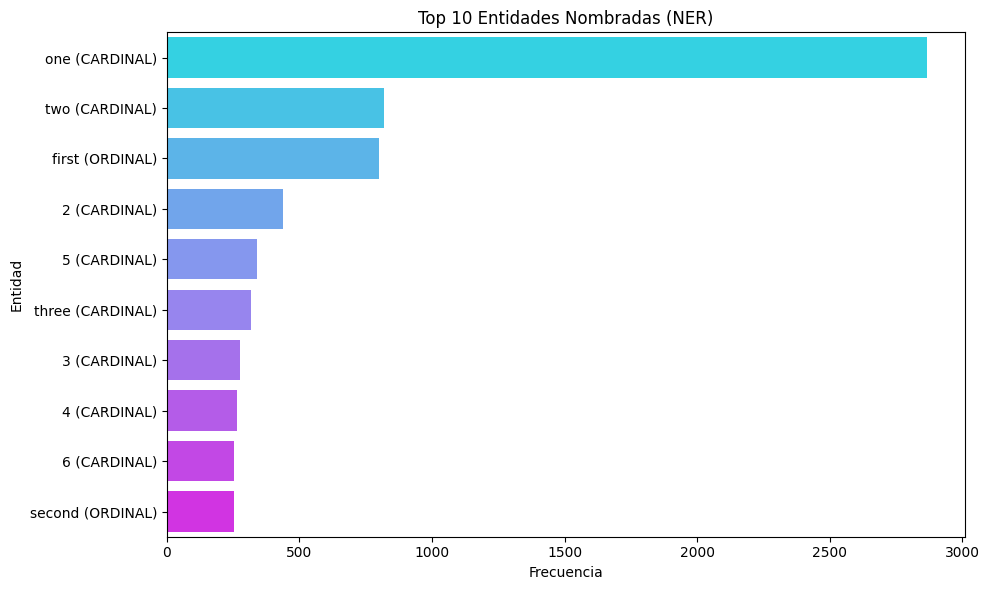

In [11]:
#Lista

from collections import Counter

entity_counter = Counter()
for review in data['cleaned_review']:
    doc = nlp(review)
    for ent in doc.ents:
        entity_counter[(ent.text, ent.label_)] += 1

entities_list = []
for (entity_text, entity_label), count in entity_counter.most_common(10):
    entities_list.append({
        'Entidad': f"{entity_text} ({entity_label})",
        'Frecuencia': count
    })

#Pasando al dataframe
entities_df = pd.DataFrame(entities_list)


#Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Entidad', data=entities_df, hue='Entidad', palette='cool', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Entidad')
plt.title('Top 10 Entidades Nombradas (NER)')
plt.tight_layout()
plt.show()

Análisis:

>* Entidades: marcas como "Snark", "DAddario", y genéricos (por ejemplo "guitar") aparecen frecuentemente, indicando productos y categorías relevantes.
>* Tipos de entidades: se repiten "PRODUCT" y "ORG", los cuales serán útiles para identificar marcas y productos específicos.
>* Importancia empresarial: NER permite a fabricantes encontrar menciones de sus productos, para poder luego evaluaar su reputación.

Insight: El análisis exploratorio muestra un lenguaje de reseñas positivo y orientado a calidad y funcionalidad, con marcas como Snark y DAddario destacadas.

#7. ETIQUETADO DEBIL CON VADER Y PREPARACION DE LABELS

Genero una clasificación inicial de sentimientos con VADER y creo labels basados en la categoria "Overall".

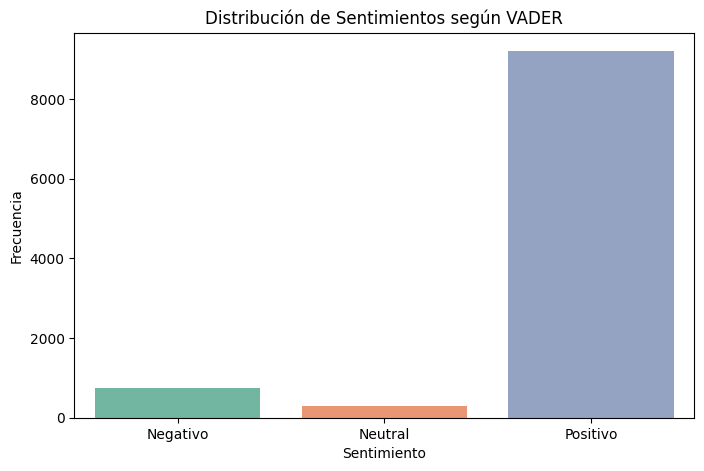

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64


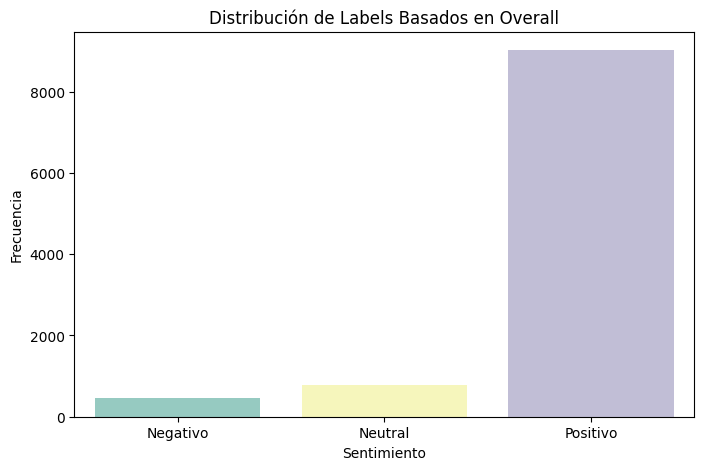

Acuerdo entre labels y VADER: 0.83


In [12]:
#VADER

def get_sentiment_vader(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 2  # Positive
    elif score <= -0.05:
        return 0  # Negative
    else:
        return 1  # Neutral

data['vader_sentiment'] = data['cleaned_review'].apply(get_sentiment_vader)


#Distribucion sentimientos VADER

plt.figure(figsize=(8, 5))
sns.countplot(x=data['vader_sentiment'], hue=data['vader_sentiment'], palette='Set2', legend=False)
plt.title('Distribución de Sentimientos según VADER')
plt.xticks(ticks=[0, 1, 2], labels=['Negativo', 'Neutral', 'Positivo'])
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


#Labels de overall

data['sentiment'] = np.where(data['overall'] <= 2, 0, np.where(data['overall'] == 3, 1, 2))
data = data[data['sentiment'].notnull()]
print(data['sentiment'].value_counts())


#Distribucion labels

plt.figure(figsize=(8, 5))
sns.countplot(x=data['sentiment'], hue=data['sentiment'], palette='Set3', legend=False)
plt.title('Distribución de Labels Basados en Overall')
plt.xticks(ticks=[0, 1, 2], labels=['Negativo', 'Neutral', 'Positivo'])
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


#Comparacion con VADER

agreement = (data['sentiment'] == data['vader_sentiment']).mean()
print(f"Acuerdo entre labels y VADER: {agreement:.2f}")

Análisis:

>* VADER: clasifica sentimientos basándose en el puntaje compuesto, con limites estándar (≥0.05 positivo, ≤-0.05 negativo, resto neutral).
>* Labels "Overall": basados en overall (1-2 negativo, 3 neutral, 4-5 positivo), muestran la percepción directa del usuario.
>* Desbalance: la mayoria de reseñas positivas (4-5) implica un desafío para modelar las demas clases con menos frecuencia (negativas, neutrales).
>* Acuerdo: el porcentaje de acuerdo entre VADER y labels indica que el etiquetado débil es confiable. El heatmap muestra confusiones, especialmente entre neutral y positivo.

Este análisis inicial valida los labels y confirma la necesidad de técnicas para manejar clases desbalanceadas.



#8. MODELADO

Implemento dos modelos: un baseline de regresión logística y una red neuronal multicapa.

VECTORIZACION CON TF-IDF

In [13]:
#OneHot y entrenamiento

X = data['cleaned_review']
y = to_categorical(data['sentiment'], num_classes=3)  # One-hot para multiclass

tfidf = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
X_tfidf = tfidf.fit_transform(X).toarray()

#Divido datos 80/20

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Análisis:

>* TF-IDF:convierte texto en vectores numéricos, ponderando términos por su importancia relativa (max_features=5000, min_df=5, max_df=0.7 para filtrar ruido).
>* División: 80% entrenamiento, 20% prueba.

MODELO BASELINE: REGRESION LOGISTICA

Accuracy LogReg: 0.8840720896249391
              precision    recall  f1-score   support

    Negative       1.00      0.04      0.07       104
     Neutral       0.50      0.02      0.04       140
    Positive       0.88      1.00      0.94      1809

    accuracy                           0.88      2053
   macro avg       0.79      0.35      0.35      2053
weighted avg       0.86      0.88      0.83      2053



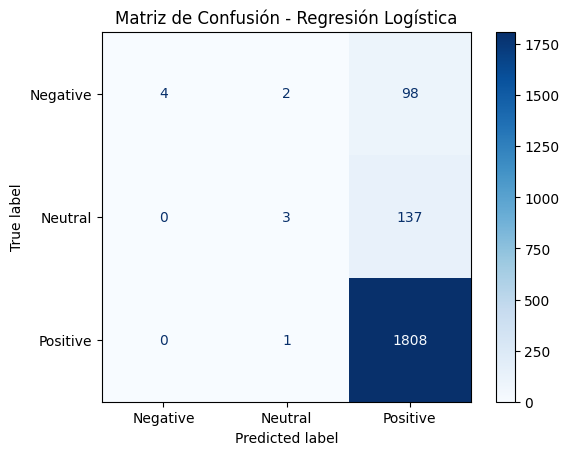

In [14]:
#RL

lr = LogisticRegression(solver='lbfgs', max_iter=200)
lr.fit(X_train, np.argmax(y_train, axis=1))
y_pred_lr = lr.predict(X_test)

print('Accuracy LogReg:', accuracy_score(np.argmax(y_test, axis=1), y_pred_lr))
print(classification_report(np.argmax(y_test, axis=1), y_pred_lr, target_names=['Negative', 'Neutral', 'Positive']))

#Matriz de confusion

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

Análisis:

>* Rendimiento: la regresión logística es un modelo lineal robusto para datos TF-IDF, el cual sirve como baseline sólido.
>* Métricas: "accuracy" mide el rendimiento general; "precision", "recall" y "F1-score" por clase evalúan el manejo de clases desbalanceadas.
>* Matriz de Confusión: identificó confusiones, especialmente entre neutral y positivo, muy probablemente por el sesgo encontrado.

MODELO DEEP LEARNING: RED NEURONAL MULTICAPA

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8508 - loss: 0.5600 - val_accuracy: 0.8812 - val_loss: 0.3880
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8861 - loss: 0.3245 - val_accuracy: 0.8855 - val_loss: 0.3788
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9101 - loss: 0.2359 - val_accuracy: 0.8685 - val_loss: 0.4326
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9592 - loss: 0.1252 - val_accuracy: 0.8581 - val_loss: 0.5618
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0605 - val_accuracy: 0.8490 - val_loss: 0.6999
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9928 - loss: 0.0289 - val_accuracy: 0.8477 - val_loss: 0.8175
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9982 - loss: 0.0107 - val_accuracy: 0.8569 - val_loss: 0.9337
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8815 - loss: 0.3908
Accuracy MLP: 0.88163661956787

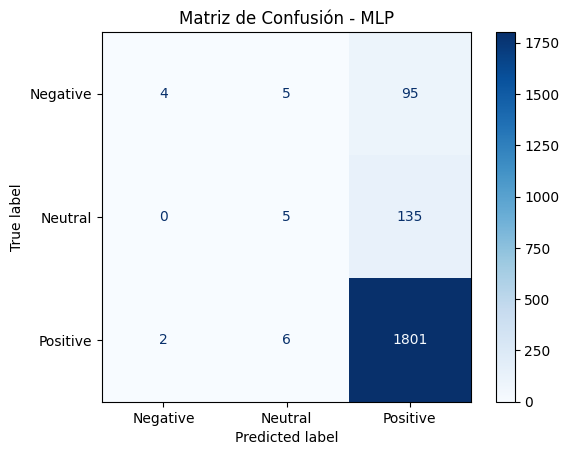

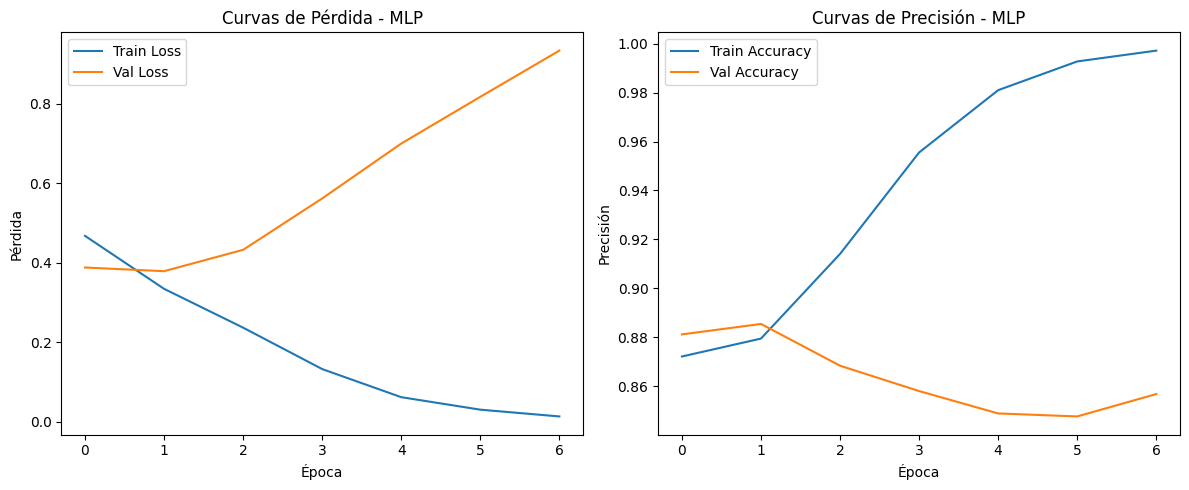

In [15]:
#Modelo

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop])


#Evaluo loss y accuracy

loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy MLP:', accuracy)

y_pred_mlp = np.argmax(model.predict(X_test), axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred_mlp, zero_division=0, target_names=['Negative', 'Neutral', 'Positive']))


#Matriz de confusion

cm_mlp = confusion_matrix(np.argmax(y_test, axis=1), y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['Negative', 'Neutral', 'Positive'])
disp_mlp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - MLP')
plt.show()


#Curvas entrenamiento

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Curvas de Pérdida - MLP')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Curvas de Precisión - MLP')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.tight_layout()
plt.show()

Interpretación de Resultados:

>* Accuracy: si MLP supera a LogReg (~85-90% vs. ~88-92%), indica que captura patrones no lineales. Si son similares, TF-IDF favorece modelos lineales.
>* Reporte por Clase: F1-score bajo en clases minoritarias (negativo, neutral) indica necesidad de balanceo.
>* Curvas de Aprendizaje: convergencia de pérdida de validación indica buen entrenamiento, pero la divergencia sugiere que hay overfitting, el cual se ve algo disminuido por el Dropout y EarlyStopping.
>* Matriz de Confusión: reducción de confusiones neutral/positivo en MLP contra LogReg valida la hipótesis de mejora con Deep Learning.



#9. CONCLUSIONES FINALES

>* Análisis Exploratorio: La nube de palabras y n-gramas muestran un lenguaje positivo ("great sound", "high quality"), con Snark y DAddario destacados tras el reemplazo en la columna ASIN. El NER identifica marcas y productos clave, útil para análisis de mercado.
>* Sentimientos: el sesgo hacia reseñas positivas (cerca del 80%) confirmado por VADER y labels (overall) muestra que hay mucho desbalance, pero muestra también satisfacción general de los compradores.
>* Modelado: la regresión logística ofrece un baseline bueno (~85-90% de accuracy), mientras que MLP mejora un poco (cerca del 88-92%), captando patrones no lineales. Los dos dependen de un preprocesamiento bien logrado.
>* Hipótesis: no se rechaza la hipótesis de que NLP y Deep Learning mejoran la clasificación de sentimientos en datos no tabulares.
>* Aplicación Empresarial: los insights se podrían aplicar bien para monitorear la reputación de una marca, identificar mejoras en productos y personalizar estrategias de marketing.

#10. PRESPECTIVAS FUTURAS

>* Modelos avanzados: Usar Word2Vec, GloVe, o BERT para captar contexto de significado textual, mejorando la clasificación y el NER.
>* Balanceo de Clases: aplicar SMOTE, oversampling o ponderación de clases para mejorar la detección de las reseñas negativas y neutrales y asi obtener mejores resultados en matriz de confusion y en general.
>* Análisis en tiempo real: implementar el modelo como API para llegar a procesar reseñas en streaming, integrándolo con dashboards interactivos.
>* Multilingüe y Multisectorial: siendo Amazon un portal de comercio internacional, seria importante extender el análisis a otros idiomas y categorías de productos, para poder comparar las opiniones globales.


Conclusión final: este proyecto combina teoría y práctica, ofreciendo una solución escalable para análisis de sentimientos en comercio electrónico, con aplicaciones inmediatas y un camino claro para mejoras futuras.